# Weighted ECM clustering vs Traditional ECM clustering
### With Ecoli (UCI dataset)

In [8]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import adjusted_rand_score, silhouette_score
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    mcg   gvh   lip  chg   aac  alm1  alm2
0  0.49  0.29  0.48  0.5  0.56  0.24  0.35
1  0.07  0.40  0.48  0.5  0.54  0.35  0.44
2  0.56  0.40  0.48  0.5  0.49  0.37  0.46
3  0.59  0.49  0.48  0.5  0.52  0.45  0.36
4  0.23  0.32  0.48  0.5  0.55  0.25  0.35
5  0.67  0.39  0.48  0.5  0.36  0.38  0.46
6  0.29  0.28  0.48  0.5  0.44  0.23  0.34
7  0.21  0.34  0.48  0.5  0.51  0.28  0.39
8  0.20  0.44  0.48  0.5  0.46  0.51  0.57
9  0.42  0.40  0.48  0.5  0.56  0.18  0.30


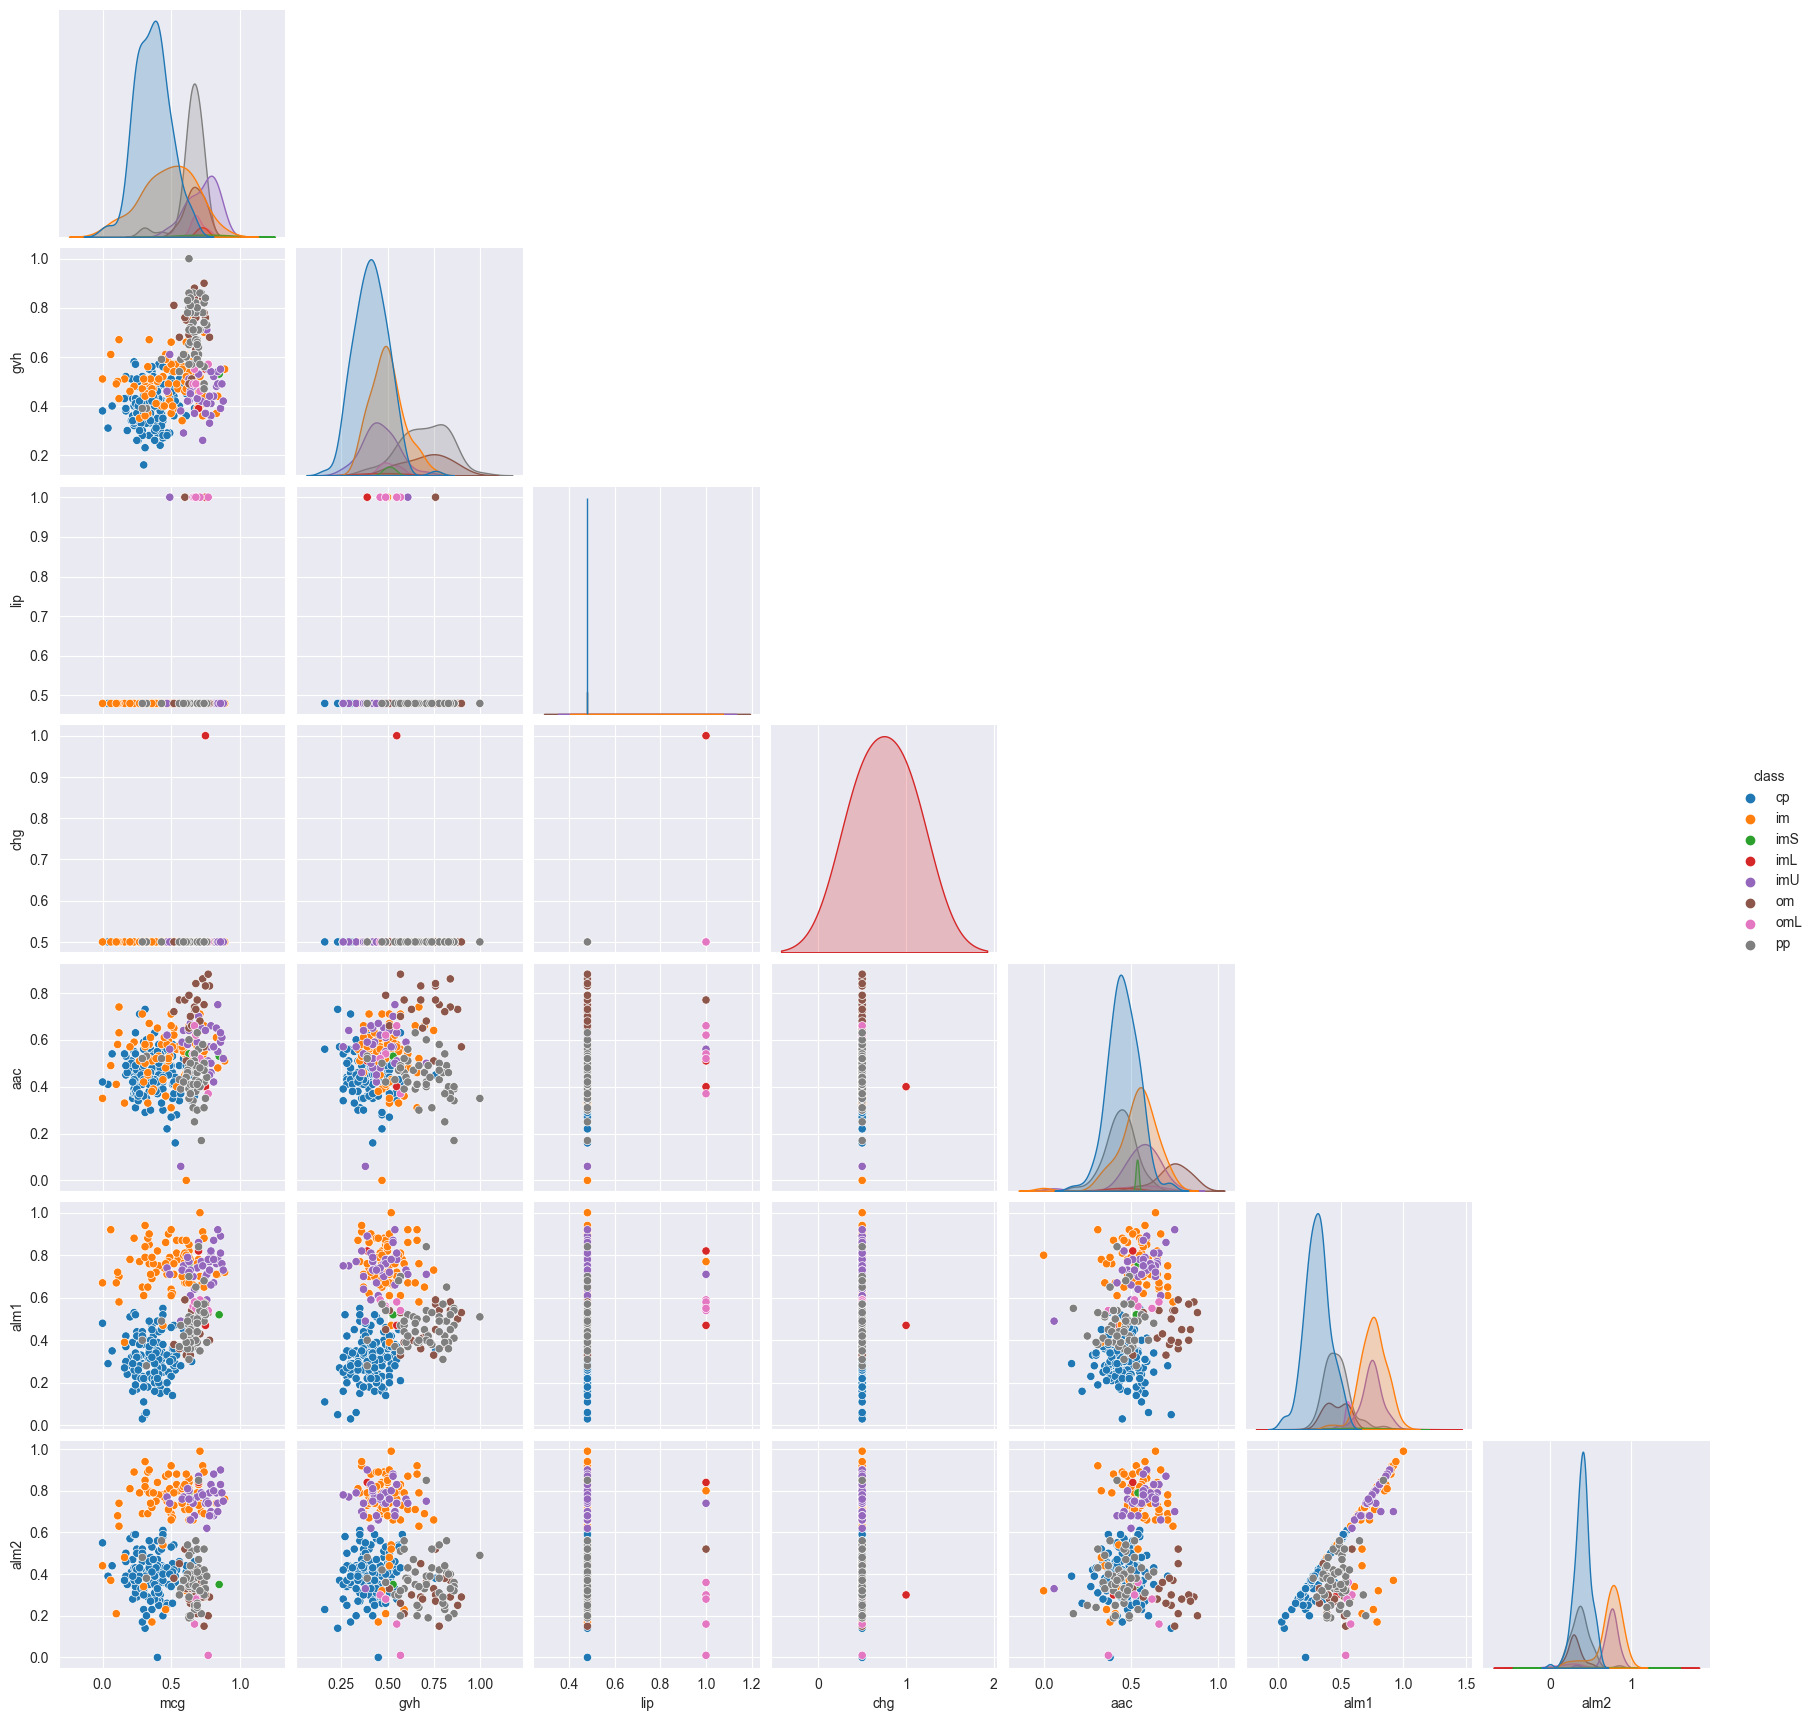

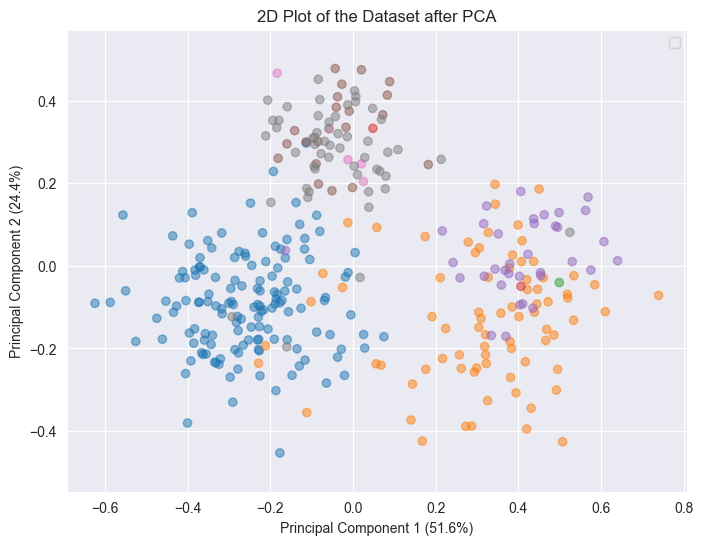

In [9]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=39)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y['class'])
df = pd.concat([X, y], axis=1)

# Scatter matrix plot
sns.pairplot(df, corner=True, hue="class")

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_reduced = pca.fit_transform(X)
variance_percent = np.round(pca.explained_variance_ratio_ * 100, 1)

# Plot the reduced dataset with different colors for each cluster
print(X[:10])
colors = [mcolors.to_rgba('C{}'.format(i)) for i in numeric_labels]

plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], alpha=0.5, c=colors)
plt.title('2D Plot of the Dataset after PCA')
plt.xlabel(f"Principal Component 1 ({variance_percent[0]}%)")
plt.ylabel(f"Principal Component 2 ({variance_percent[1]}%)")
plt.legend()
plt.grid(True)
plt.axis('equal')
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Traditional ECM

[1, 0.7275787246871479]
[2, 0.6931009776087894]
[3, 0.6731984445234594]
[4, 0.664904962076769]
[5, 0.6611035973167163]
[6, 0.6577458932760208]
[7, 0.6543101543617732]
[8, 0.6511421871416678]
[9, 0.6485672372384511]
[10, 0.6462055439366993]
[11, 0.6440809562210448]
[12, 0.6424048529997081]
[13, 0.6412880503438461]
[14, 0.6406322786314335]
[0.         0.64063228 0.64063228]
[1, 0.7260557825141357]
[2, 0.6918011544212416]
[3, 0.6727590986539134]
[4, 0.6646265611434256]
[5, 0.6608773272048656]
[6, 0.6574849844252283]
[7, 0.6539940745881214]
[8, 0.6508232593598559]
[9, 0.648267875140982]
[10, 0.6459544380667727]
[11, 0.6439076662466395]
[12, 0.6423048680741325]
[13, 0.6412360184572076]
[14, 0.6406002696306593]
[1.         0.64060027 0.64060027]
[1, 0.7443149377199025]
[2, 0.701301965494095]
[3, 0.6799081919291939]
[4, 0.6702521167107275]
[5, 0.6657674409767311]
[6, 0.6619914447727144]
[7, 0.6581936939229472]
[8, 0.6543779956238361]
[9, 0.6508565511909673]
[10, 0.6483449342956182]
[11, 0.646

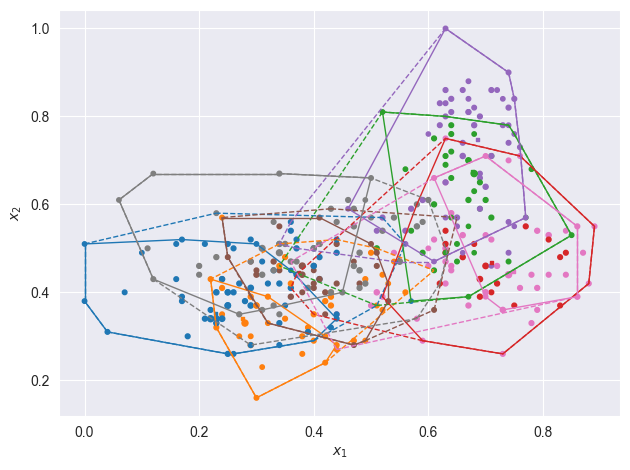

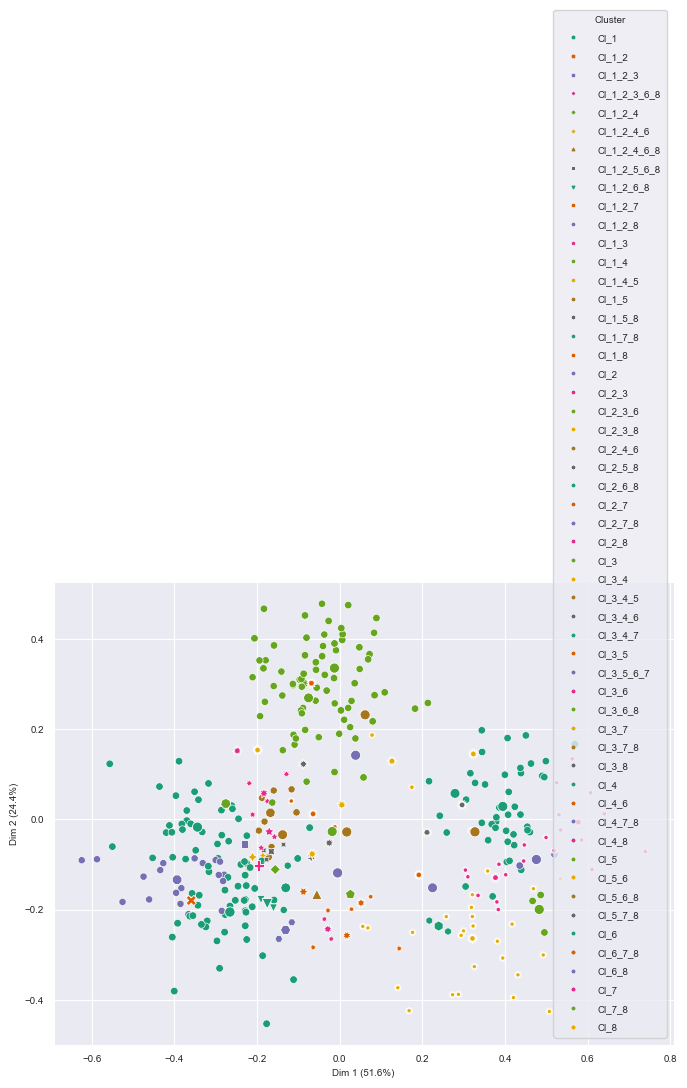

In [12]:
# Traditional ECM clustering
model = ecm(x=X, c=8, beta=2, alpha=1, delta=100, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

# Plots
ev_plot(model, X=X, cex=20, Approx=0)
ev_pcaplot(data=X, x=model, normalize=False, cex=30)

## Weighted ECM (WECM)

In [17]:
# Feature weighted ECM clustering
W = np.array([
    [4.76032892e-02, 1.37650860e-01, 9.99962741e-02, 5.39985465e-03,
     5.48988213e-01, 9.36092728e-02, 6.67522366e-02],
    [8.54669836e-02, 1.51872941e-01, 1.65674749e-01, 3.65775914e-03,
     1.88115417e-01, 1.55606885e-01, 2.49605264e-01],
    [8.90675469e-02, 3.01337682e-01, 2.32952118e-01, 1.34287731e-01,
     1.45305384e-02, 2.16790212e-01, 1.10341721e-02],
    [2.68574437e-02, 6.65903815e-02, 3.96228982e-02, 3.78931737e-02,
     3.68249242e-01, 1.47724759e-01, 3.13062101e-01],
    [3.12995623e-02, 2.03102507e-01, 4.05740112e-01, 2.02947946e-01,
     1.32344719e-01, 2.55483367e-03, 2.20103201e-02],
    [1.03443910e-01, 6.43544784e-02, 4.75859943e-01, 1.81726746e-04,
     3.11672862e-01, 3.95562860e-02, 4.93079359e-03],
    [7.63696201e-02, 1.55546563e-01, 1.47731534e-01, 1.95803601e-01,
     1.66741305e-01, 8.32863866e-02, 1.74520990e-01],
    [3.64362771e-02, 6.72542946e-02, 2.58030313e-01, 3.79501076e-01,
     4.06307010e-02, 1.41502838e-01, 7.66445000e-02]
])
c = 8
model = wecm(x=X, c=c, W=W, beta=2, alpha=1, delta=100, epsi=1e-3, ntrials=10)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Weighted ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n{model['g']}")
print(f"Final weights: \n{model['W']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)

Initial weights: 
 [[4.76032892e-02 1.37650860e-01 9.99962741e-02 5.39985465e-03
  5.48988213e-01 9.36092728e-02 6.67522366e-02]
 [8.54669836e-02 1.51872941e-01 1.65674749e-01 3.65775914e-03
  1.88115417e-01 1.55606885e-01 2.49605264e-01]
 [8.90675469e-02 3.01337682e-01 2.32952118e-01 1.34287731e-01
  1.45305384e-02 2.16790212e-01 1.10341721e-02]
 [2.68574437e-02 6.65903815e-02 3.96228982e-02 3.78931737e-02
  3.68249242e-01 1.47724759e-01 3.13062101e-01]
 [3.12995623e-02 2.03102507e-01 4.05740112e-01 2.02947946e-01
  1.32344719e-01 2.55483367e-03 2.20103201e-02]
 [1.03443910e-01 6.43544784e-02 4.75859943e-01 1.81726746e-04
  3.11672862e-01 3.95562860e-02 4.93079359e-03]
 [7.63696201e-02 1.55546563e-01 1.47731534e-01 1.95803601e-01
  1.66741305e-01 8.32863866e-02 1.74520990e-01]
 [3.64362771e-02 6.72542946e-02 2.58030313e-01 3.79501076e-01
  4.06307010e-02 1.41502838e-01 7.66445000e-02]]
---------Iteration #1---------
Initial prototypes: 
 [[0.71126984 0.48285714 0.49650794 0.5        0

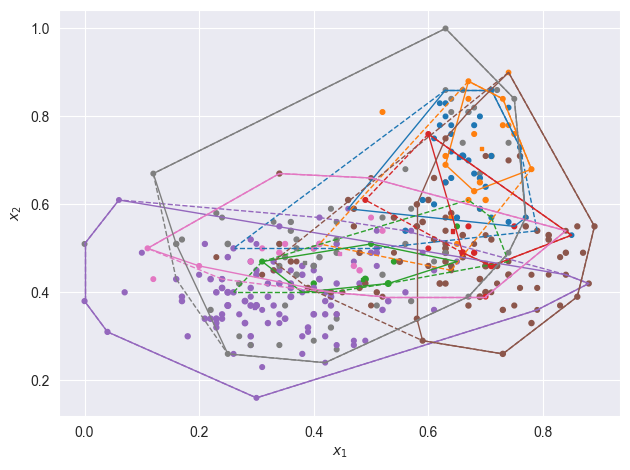

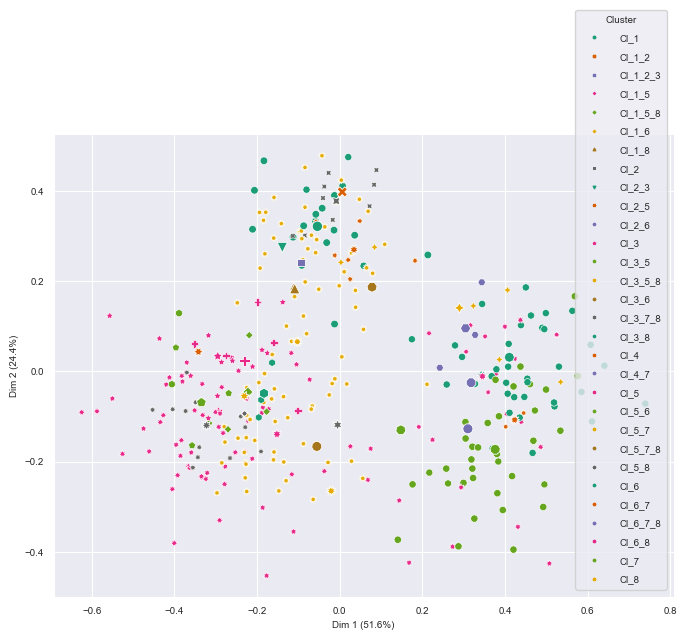

Covariance Matrix 1: [0.00255833 0.009901   0.010816   0.         0.00128767 0.008491
 0.01254733]
Covariance Matrix 2: [3.42647059e-03 1.04888889e-02 3.26275191e-33 0.00000000e+00
 1.02823529e-02 5.83692810e-03 4.74673203e-03]
Covariance Matrix 3: [0.00598393 0.00096964 0.         0.         0.01976429 0.00289821
 0.004     ]
Covariance Matrix 4: [0.00632381 0.00995714 0.03862857 0.03571429 0.01402381 0.00191429
 0.01172857]
Covariance Matrix 5: [0.01897689 0.00606967 0.         0.         0.00507377 0.04234749
 0.02714579]
Covariance Matrix 6: [1.43692242e-02 1.43185848e-02 1.25072156e-32 0.00000000e+00
 4.73942882e-03 8.56641091e-03 1.97436061e-02]
Covariance Matrix 7: [0.03025873 0.00372844 0.0268254  0.         0.00668042 0.00562579
 0.00360899]
Covariance Matrix 8: [2.96412363e-02 2.83901213e-02 3.12488915e-33 0.00000000e+00
 2.15414710e-02 6.68996479e-03 8.59059077e-03]


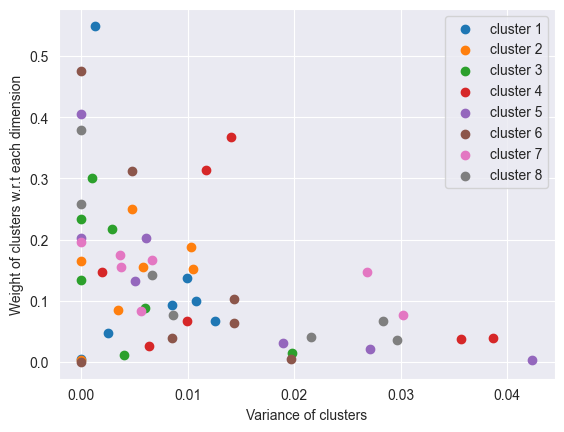

In [18]:

# Plotting PCA 
ev_plot(model, X=X, cex=20, Approx=0)
ev_pcaplot(data=X, x=model, normalize=False, cex=30)

# Weight-Variance correlation plot
W = model['W']
cov_mat1 = np.cov(X[predicted_labels == 0].transpose())
cov_mat2 = np.cov(X[predicted_labels == 1].transpose())
cov_mat3 = np.cov(X[predicted_labels == 2].transpose())
cov_mat4 = np.cov(X[predicted_labels == 3].transpose())
cov_mat5 = np.cov(X[predicted_labels == 4].transpose())
cov_mat6 = np.cov(X[predicted_labels == 5].transpose())
cov_mat7 = np.cov(X[predicted_labels == 6].transpose())
cov_mat8 = np.cov(X[predicted_labels == 7].transpose())
print(f"Covariance Matrix 1: {cov_mat1.diagonal()}")
print(f"Covariance Matrix 2: {cov_mat2.diagonal()}")
print(f"Covariance Matrix 3: {cov_mat3.diagonal()}")
print(f"Covariance Matrix 4: {cov_mat4.diagonal()}")
print(f"Covariance Matrix 5: {cov_mat5.diagonal()}")
print(f"Covariance Matrix 6: {cov_mat6.diagonal()}")
print(f"Covariance Matrix 7: {cov_mat7.diagonal()}")
print(f"Covariance Matrix 8: {cov_mat8.diagonal()}")
W_COV_1 = pd.DataFrame({'y': W[0, :], 'x': cov_mat1.diagonal()})
W_COV_1.sort_values('x', inplace=True)
W_COV_2 = pd.DataFrame({'y': W[1, :], 'x': cov_mat2.diagonal()})
W_COV_2.sort_values('x', inplace=True)
W_COV_3 = pd.DataFrame({'y': W[2, :], 'x': cov_mat3.diagonal()})
W_COV_3.sort_values('x', inplace=True)
W_COV_4 = pd.DataFrame({'y': W[3, :], 'x': cov_mat4.diagonal()})
W_COV_4.sort_values('x', inplace=True)
W_COV_5 = pd.DataFrame({'y': W[4, :], 'x': cov_mat5.diagonal()})
W_COV_5.sort_values('x', inplace=True)
W_COV_6 = pd.DataFrame({'y': W[5, :], 'x': cov_mat6.diagonal()})
W_COV_6.sort_values('x', inplace=True)
W_COV_7 = pd.DataFrame({'y': W[6, :], 'x': cov_mat7.diagonal()})
W_COV_7.sort_values('x', inplace=True)
W_COV_8 = pd.DataFrame({'y': W[7, :], 'x': cov_mat8.diagonal()})
W_COV_8.sort_values('x', inplace=True)

plt.clf()
plt.scatter(W_COV_1['x'], W_COV_1['y'], label="cluster 1", marker='o')
plt.scatter(W_COV_2['x'], W_COV_2['y'], label="cluster 2", marker='o')
plt.scatter(W_COV_3['x'], W_COV_3['y'], label="cluster 3", marker='o')
plt.scatter(W_COV_4['x'], W_COV_4['y'], label="cluster 4", marker='o')
plt.scatter(W_COV_5['x'], W_COV_5['y'], label="cluster 5", marker='o')
plt.scatter(W_COV_6['x'], W_COV_6['y'], label="cluster 6", marker='o')
plt.scatter(W_COV_7['x'], W_COV_7['y'], label="cluster 7", marker='o')
plt.scatter(W_COV_8['x'], W_COV_8['y'], label="cluster 8", marker='o')
plt.xlabel("Variance of clusters")
plt.ylabel("Weight of clusters w.r.t each dimension")
plt.legend()
plt.show()

## Non-specificity equation
![test.png](../assets/normlaized-non-specificity.png)